# Gathering Data Phase

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import time
import json
import requests
import re

In [ ]:
df_csv = pd.read_csv('/content/twitter-archive-enhanced.csv')

In [ ]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = "image_predictions.tsv"
response = requests.get(url)
if response.status_code == 200:
    with open(file_name, "wb") as file:
        file.write(response.content)
    print(f"The {file_name} has downloaded succesfuly")
else:
    print("there is error while downloading the file")


The image_predictions.tsv has downloaded succesfuly


In [ ]:
df_tsv = pd.read_csv('image_predictions.tsv')

In [ ]:
tweet_data = []

with open('/content/tweet-json.txt', 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_data.append({
                'tweet_id': tweet.get('id'),
                'retweet_count': tweet.get('retweet_count'),
                'favorite_count': tweet.get('favorite_count')
            })
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON line: {e}")

df_tweets = pd.DataFrame(tweet_data)


# Assessing Data Phase

In [ ]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       2356 non-null   float64       
 2   in_reply_to_user_id         2356 non-null   float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         2356 non-null   float64       
 7   retweeted_status_user_id    2356 non-null   float64       
 8   retweeted_status_timestamp  2356 non-null   object        
 9   expanded_urls               2356 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [ ]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [ ]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [ ]:
df_csv.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,0
in_reply_to_user_id,0
timestamp,0
source,0
text,0
retweeted_status_id,0
retweeted_status_user_id,0
retweeted_status_timestamp,0
expanded_urls,0


In [ ]:
df_tsv.isnull().sum()

,0
tweet_id,0


In [ ]:
df_tweets.isnull().sum()

,0
tweet_id,0
retweet_count,0
favorite_count,0


In [ ]:
df_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Unknown,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Unknown,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Unknown,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Unknown,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Unknown,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0


In [ ]:
df_tsv.head()

,tweet_id
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [ ]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


**Quality Issues**
               
               1- There Is NaN Values In the df_csv in columns (in_reply_to_status_id	in_reply_to_user_idretweeted_status_id	retweeted_status_user_id	retweeted_status_timestampname	doggo	floofer	pupper	puppo)
               2-There is a invalid Data in columns(rating_numerator	rating_denominator)
               3-There is a +0000 after each time in column (timestamp)
               4-the image sources in column (source) it still in html design
               5- Unrealistic Dog Names like: "a", "an", "the
               6-Duplicate Rows or Predictions
               7-Some Tweets Do Not Contain Images
               8-Non-Numeric Values in Numeric Columns
              
**Tidness Issues**

               1-merge dog stage in one column

               

# Cleaning Data

In [ ]:
## Here I Make The Archive Of the files To BE Safe
df_csv_archive_clean = df_csv
df_tsv_archive_clean = df_tsv
df_tweets_archive_clean = df_tweets

In [ ]:
df_csv_archive_copy = df_csv_archive_clean
df_tsv_archive_clean_copy = df_tsv_archive_clean
df_tweets_archive_clean_copy = df_tweets_archive_clean

df_csv_archive_clean = df_csv_archive_clean[
    df_csv_archive_clean['retweeted_status_id'].isnull() &
    df_csv_archive_clean['retweeted_status_user_id'].isnull() &
    df_csv_archive_clean['retweeted_status_timestamp'].isnull()
]

df_csv_archive_clean.drop(
    ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
    axis=1, inplace=True
)

<ipython-input-397-60df654ed50c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_archive_clean.drop(


**Issue 1**

Define:There Is NaN Values In the df_csv in columns (in_reply_to_status_id    in_reply_to_user_idretweeted_status_id    retweeted_status_user_id    retweeted_status_timestampname    doggo    floofer    pupper    puppo)

In [ ]:
## Code
df_csv_archive_clean.fillna(0,inplace=True)

In [ ]:
## Test
df_csv_archive_clean.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,0
in_reply_to_user_id,0
timestamp,0
source,0
text,0
retweeted_status_id,0
retweeted_status_user_id,0
retweeted_status_timestamp,0
expanded_urls,0


**Issue 2**

Define:There is a invalid Data in columns(rating_numerator    rating_denominator)

In [ ]:
## Code
df_csv_archive_clean['rating_numerator'] = df_csv_archive_clean['rating_numerator'].apply(lambda x: 10 if x > 10 else x)

In [ ]:
## Test
df_csv_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0


**Issue 3**

Define:There is a +0000 after each time in column (timestamp)

In [ ]:
## Code
df_csv_archive_clean['timestamp'] = pd.to_datetime(df_csv_archive_clean['timestamp']).dt.tz_localize(None)

In [ ]:
## Test
df_csv_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0


**Issue 4**

Define:the image sources in column (source) it still in html design

In [ ]:
## Code
df_csv_archive_clean['source'] = df_csv_archive_clean['source'].apply(lambda x: re.findall(r'>(.*?)<', x)[0])

In [ ]:
## Test
df_csv_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0


**Issue 5**

Define:merge dog stage in one column

In [404]:
## Code
stages = ['doggo', 'floofer', 'pupper', 'puppo']
def get_stage(row):
    stage = [st for st in stages if row[st] != 'None']
    return ','.join(stage) if stage else 'None'
# استبدال القيم 'None' بـ NaN لتسهيل المعالجة
df_csv_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = df_csv_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', pd.NA)

# إنشاء عمود جديد 'dog_stage' بدمج القيم من الأعمدة الأربعة
df_csv_archive_clean['dog_stage'] = df_csv_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda row: ', '.join(row.dropna()), axis=1)

# استبدال القيم الفارغة بسلسلة فارغة
df_csv_archive_clean['dog_stage'] = df_csv_archive_clean['dog_stage'].replace('', pd.NA)

# حذف الأعمدة الأصلية
df_csv_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


<ipython-input-404-d13450c7283b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


In [405]:

## Test
df_csv_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


**Issue 6**

Define:Unrealistic Dog Names like: "a", "an", "the

In [ ]:
## Code
fake_names = ['a', 'an', 'the', 'this', 'very', 'quite', 'actually', 'just', 'such','0']
df_csv_archive_clean['name'] = df_csv_archive_clean['name'].replace(fake_names, np.nan)

In [ ]:
## Test
df_csv_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,0.0,0.0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,0.0,0.0,0,https://twitter.com/dog_rates/status/666049248...,5,10,0,0,0,0,0
2352,666044226329800704,0.0,0.0,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,0.0,0.0,0,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,0,0,0,0
2353,666033412701032449,0.0,0.0,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,0.0,0.0,0,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,0,0,0,0
2354,666029285002620928,0.0,0.0,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,0.0,0.0,0,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,0,0,0,0


**Issue 7**

Define:Duplicate Rows or Predictions

In [ ]:
## Code
df_csv_archive_clean = df_csv_archive_clean.drop_duplicates(subset='tweet_id')

In [ ]:
## Test
df_csv_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,0.0,0.0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,0.0,0.0,0,https://twitter.com/dog_rates/status/666049248...,5,10,0,0,0,0,0
2352,666044226329800704,0.0,0.0,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,0.0,0.0,0,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,0,0,0,0
2353,666033412701032449,0.0,0.0,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,0.0,0.0,0,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,0,0,0,0
2354,666029285002620928,0.0,0.0,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,0.0,0.0,0,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,0,0,0,0


**Issue 8**

Define:Non-Numeric Values in Numeric Columns

In [ ]:
## Code
df_csv_archive_clean['rating_numerator'] = pd.to_numeric(df_csv_archive_clean['rating_numerator'], errors='coerce')
df_csv_archive_clean['rating_denominator'] = pd.to_numeric(df_csv_archive_clean['rating_denominator'], errors='coerce')
df_csv_archive_clean = df_csv_archive_clean[df_csv_archive_clean['rating_numerator'].notnull()]
df_csv_archive_clean = df_csv_archive_clean[df_csv_archive_clean['rating_denominator'].notnull()]

In [ ]:
## Test
print(df_csv_archive_clean['rating_numerator'].value_counts().sort_index())

rating_numerator
0        2
1        9
2        9
3       19
4       17
5       37
6       32
7       55
8      102
9      158
10    1916
Name: count, dtype: int64


**Issue 9**

Define:Some Tweets Do Not Contain Images

In [ ]:
## Code
df_csv_archive_clean = df_csv_archive_clean[df_csv_archive_clean['expanded_urls'].notnull()]

In [ ]:
## Test
df_csv_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0


In [ ]:
##HERe i merged the files after cleaning
df = pd.merge(df_csv_archive_clean, df_tsv_archive_clean, on='tweet_id', how='left')
df = pd.merge(df, df_tweets_archive_clean, on='tweet_id', how='left')

In [ ]:
##HEre i drop the NAN Values
df.dropna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0,8853.0,39467.0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0,6514.0,33819.0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0,4328.0,25461.0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0,8964.0,42908.0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0,9774.0,41048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,0.0,0.0,2015-11-16 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspan...,0.0,0.0,0,https://twitter.com/dog_rates/status/666082916...,6,10,0,0,0,0,0,47.0,121.0
2343,666073100786774016,0.0,0.0,2015-11-16 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,0.0,0.0,0,https://twitter.com/dog_rates/status/666073100...,10,10,0,0,0,0,0,174.0,335.0
2344,666071193221509120,0.0,0.0,2015-11-16 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,0.0,0.0,0,https://twitter.com/dog_rates/status/666071193...,9,10,0,0,0,0,0,67.0,154.0
2351,666049248165822465,0.0,0.0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,0.0,0.0,0,https://twitter.com/dog_rates/status/666049248...,5,10,0,0,0,0,0,41.0,111.0


In [ ]:
df.to_csv('twitter_archive_master.csv', index=False)
df = pd.read_csv('twitter_archive_master.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,0,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,0,0,0,0,8853.0,39467.0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,0.0,0.0,0,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,0,0,0,0,6514.0,33819.0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,0,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,0,0,0,0,4328.0,25461.0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,0.0,0.0,0,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,0,0,0,0,8964.0,42908.0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,0.0,0.0,0,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,0,0,0,0,9774.0,41048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,0.0,0.0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,0.0,0.0,0,https://twitter.com/dog_rates/status/666049248...,5,10,0,0,0,0,0,41.0,111.0
2352,666044226329800704,0.0,0.0,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,0.0,0.0,0,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,0,0,0,0,147.0,311.0
2353,666033412701032449,0.0,0.0,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,0.0,0.0,0,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,0,0,0,0,47.0,128.0
2354,666029285002620928,0.0,0.0,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,0.0,0.0,0,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,0,0,0,0,48.0,132.0


In [ ]:
df_csv_archive_clean['source'] = df_csv_archive_clean['source'].apply(
    lambda x: re.findall(r'>(.*?)<', x)[0] if re.findall(r'>(.*?)<', x) else 'Unknown'
)


# Storing Data

In [ ]:
df_merged = pd.merge(df_csv_archive_clean, df_tsv_archive_clean, on='tweet_id', how='inner')
twitter_archive_master = pd.merge(df_merged, df_tweets_archive_clean, on='tweet_id', how='inner')

In [ ]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [407]:
# دمج df_archive مع df_image_predictions باستخدام 'tweet_id'
df_combined = pd.merge(df_csv_archive_clean, df_tsv_archive_clean, on='tweet_id', how='left')

# دمج النتيجة مع df_tweet_json باستخدام 'tweet_id'
df_master = pd.merge(df_combined, df_tweets_archive_clean, on='tweet_id', how='left')


# Analyzing and Visualizing Data

In [ ]:
twitter_archive_master['rating_numerator'].value_counts().sort_index() #first insight

,count
rating_numerator,


In [ ]:
twitter_archive_master['name'].value_counts().head(10) #second insight

,count
name,


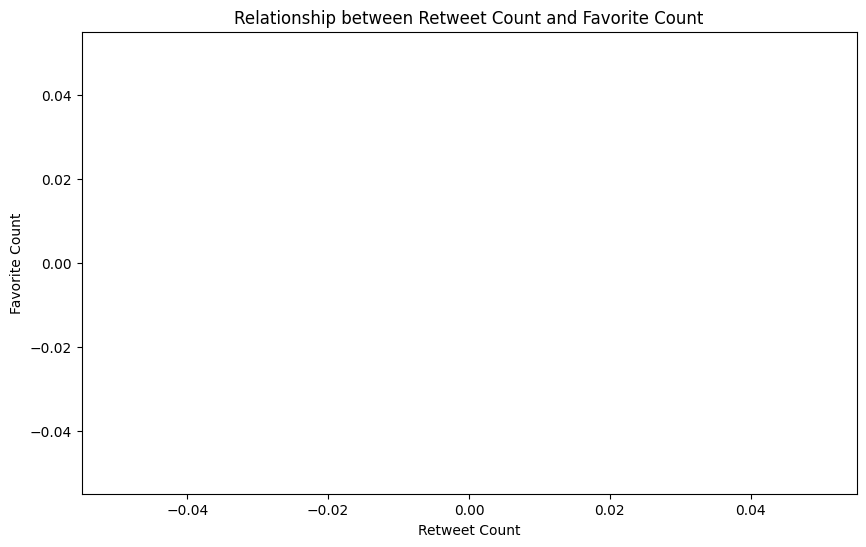

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=twitter_archive_master, x='retweet_count', y='favorite_count')

plt.title('Relationship between Retweet Count and Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.savefig('retweet_vs_favorite_count.png')
plt.show()


In [ ]:
print(df_csv_archive_clean.columns)
print(df_tsv_archive_clean.columns)
print(df_tweets_archive_clean.columns)


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id'], dtype='object')
Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')


In [ ]:
print("CSV archive columns:", df_csv_archive_clean.columns.tolist())
print("TSV archive columns:", df_tsv_archive_clean.columns.tolist())
print("Tweets archive columns:", df_tweets_archive_clean.columns.tolist())



CSV archive columns: ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']
TSV archive columns: ['tweet_id']
Tweets archive columns: ['tweet_id', 'retweet_count', 'favorite_count']


In [ ]:
df_csv_archive_clean.rename(columns={'Tweet_id': 'tweet_id'}, inplace=True)
df_tsv_archive_clean.rename(columns={'tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog': 'tweet_id'}, inplace=True)
df_tweets_archive_clean.rename(columns={'tweet_ID': 'tweet_id'}, inplace=True)


In [ ]:
df_csv_archive_clean['tweet_id'] = df_csv_archive_clean['tweet_id'].astype(str)
df_tsv_archive_clean['tweet_id'] = df_tsv_archive_clean['tweet_id'].astype(str)
df_tweets_archive_clean['tweet_id'] = df_tweets_archive_clean['tweet_id'].astype(str)
